In [1]:
url = "https://www.agof.de/service-downloads/downloadcenter/download-daily-digital-facts/"

In [2]:
import requests

In [3]:
rv = requests.get(url)

In [4]:
body = rv.content.decode("utf-8")

In [5]:
type(body)

str

In [6]:
#body

In [7]:
from bs4 import BeautifulSoup

In [8]:
soup = BeautifulSoup(body, "html.parser")

In [9]:
tables_list = soup.find_all("tr")

In [10]:
tables_list[1]

<tr><td><a href="https://www.agof.de/?wpfb_dl=8556" target="_blank">ddf_Oktober_2021_Angebote_Ranking_Digital</a></td><td>xlsx</td><td>49.0 KB</td></tr>

In [11]:
first_tag = tables_list[1]

In [12]:
first_tag.text

'ddf_Oktober_2021_Angebote_Ranking_Digitalxlsx49.0 KB'

In [13]:
links = [item for item in tables_list if "Angebote Ranking" in item.text]

In [14]:

links_list = [item for item in links if "xlsx" in item.text]

In [15]:
str(links_list[0])

'<tr><td><a href="https://www.agof.de/?wpfb_dl=8254" target="_blank">Ddf März 2021 Angebote Ranking Digital</a></td><td>xlsx</td><td>50.5 KB</td></tr>'

In [16]:
import re
re.findall("href=[\"\'](.+?)[\"\']", str(links_list[0]))

['https://www.agof.de/?wpfb_dl=8254']

In [17]:

xls = []
for i in links_list:
    xls.append(re.findall("href=[\"\'](.+?)[\"\']", str(i))[0])


In [18]:
#xls

In [19]:
xls[0]

'https://www.agof.de/?wpfb_dl=8254'

In [20]:
len(xls)

135

In [21]:
# process the first item, then create a loop to process a couple more
rv = requests.get(xls[0])

In [22]:
open("/tmp/test.xlsx", "wb").write(rv.content)

50537

In [23]:
import pandas as pd
#df2 = pd.read_excel("/tmp/test.xlsx", skiprows = 8) #- also possible but we loose meta data

In [24]:
# read data without skipping rows and find out the start
df = pd.read_excel("/tmp/test.xlsx", header=None)

In [25]:
df.shape

(422, 7)

In [26]:
df.head()

0                                                  1    2  \
0          Analyse         daily digital facts 08.04.2021 / Rangreihe  NaN   
1  Grundgesamtheit                                 16 Jahre und älter  NaN   
2         Zeitraum                         Letzter Monat (März 2021)   NaN   
3        Vorfilter  Nutzer mobiler und/oder stationärer Angebote (...  NaN   
4              NaN  (279.781 ungew. Fälle, 280.507 gew. Fälle, 61,...  NaN   

     3    4    5    6  
0  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN

In [27]:
assert df.iloc[0, 0] == "Analyse"
analyse = df.iloc[0, 1]
assert df.iloc[1, 0] == "Grundgesamtheit"
grundgesamtheit = df.iloc[1, 1]
assert df.iloc[2, 0] == "Zeitraum"
zeitraum = df.iloc[2, 1]
assert df.iloc[3, 0] == "Vorfilter"
vorfilter = df.iloc[3, 1]
vorfilter_fallzahl = df.iloc[4, 1]
assert df.iloc[5, 0] == "Zielgruppe"
zielgruppe = df.iloc[5, 1]
zielgruppe_fallzahl = df.iloc[6, 1]

In [28]:
ln = 7
while df.iloc[ln, 0] != "Basis":
    ln += 1
    if ln > 1000:
        raise  RuntimeError("failed to identify start of data")

In [29]:
ln

9

In [30]:
dframe = df.iloc[ln:].copy()

In [31]:
dframe.head()

0                        1  2       3     4      5  \
9                Basis                      NaN  0  279781   100  61.17   
10  ebay Kleinanzeigen  Digitales Gesamtangebot  0  204530  65.6  40.14   
11            t-online  Digitales Gesamtangebot  0  166282  51.2  31.34   
12        FOCUS Online  Digitales Gesamtangebot  0  142662  44.4  27.17   
13     DER SPIEGEL SPM  Digitales Gesamtangebot  0  143586  43.9  26.85   

           6  
9        NaN  
10  13836.26  
11   1911.29  
12    526.58  
13    747.81

In [32]:
dframe = df.iloc[ln:].copy()
cols = list(df.iloc[ln-1])
cols[0] = "Titel"
dframe.columns = ["" if pd.isnull(c)
             else c.replace("\n", " ").replace(".", "") for c in cols]
if "" in dframe.columns:
    dframe.drop([""], axis=1, inplace=True)
dframe["Analyse"] = analyse
dframe["Grundgesamtheit"] = grundgesamtheit
dframe["Zeitraum"] = zeitraum
dframe["Vorfilter"] = vorfilter
dframe["Zielgruppe"] = zielgruppe

In [33]:
dframe.head()

Titel                Medientyp  \
9                Basis                      NaN   
10  ebay Kleinanzeigen  Digitales Gesamtangebot   
11            t-online  Digitales Gesamtangebot   
12        FOCUS Online  Digitales Gesamtangebot   
13     DER SPIEGEL SPM  Digitales Gesamtangebot   

   Ungew Fälle auf Basis Gesamt 16+ Fälle (ungew) auf Basis ZG/Vorfilter  \
9                                 0                               279781   
10                                0                               204530   
11                                0                               166282   
12                                0                               142662   
13                                0                               143586   

   Unique User % Unique User Mio Kontakte Mio  \
9            100           61.17          NaN   
10          65.6           40.14     13836.26   
11          51.2           31.34      1911.29   
12          44.4           27.17       526.58   
13          43.9           26.85       747.81   

                                       Analyse     Grundgesamtheit  \
9   daily digital facts 08.04.2021 / Rangreihe  16 Jahre und älter   
10  daily digital facts 08.04.2021 / Rangreihe  16 Jahre und älter   
11  daily digital facts 08.04.2021 / Rangreihe  16 Jahre und älter   
12  daily digital facts 08.04.2021 / Rangreihe  16 Jahre und älter   
13  daily digital facts 08.04.2021 / Rangreihe  16 Jahre und älter   

                      Zeitraum  \
9   Letzter Monat (März 2021)    
10  Letzter Monat (März 2021)    
11  Letzter Monat (März 2021)    
12  Letzter Monat (März 2021)    
13  Letzter Monat (März 2021)    

                                            Vorfilter Zielgruppe  
9   Nutzer mobiler und/oder stationärer Angebote (...     Gesamt  
10  Nutzer mobiler und/oder stationärer Angebote (...     Gesamt  
11  Nutzer mobiler und/oder stationärer Angebote (...     Gesamt  
12  Nutzer mobiler und/oder stationärer Angebote (...     Gesamt  
13  Nutzer mobiler und/oder stationärer Angebote (...     Gesamt

In [34]:
dframe.Zeitraum.value_counts()

Letzter Monat (März 2021)     413
Name: Zeitraum, dtype: int64

In [35]:
def process(df):
    assert df.iloc[0, 0] == "Analyse"
    analyse = df.iloc[0, 1]
    assert df.iloc[1, 0] == "Grundgesamtheit"
    grundgesamtheit = df.iloc[1, 1]
    assert df.iloc[2, 0] == "Zeitraum"
    zeitraum = df.iloc[2, 1]
    assert df.iloc[3, 0] == "Vorfilter"
    vorfilter = df.iloc[3, 1]
    vorfilter_fallzahl = df.iloc[4, 1]
    assert df.iloc[5, 0] == "Zielgruppe"
    zielgruppe = df.iloc[5, 1]
    zielgruppe_fallzahl = df.iloc[6, 1]
    ln = 7
    while df.iloc[ln, 0] != "Basis":
        ln += 1
        if ln > 1000:
            raise  RuntimeError("failed to identify start of data")
    d = df.iloc[ln:].copy()
    cols = list(df.iloc[ln-1])
    cols[0] = "Titel"
    d.columns = ["" if pd.isnull(c)
                 else c.replace("\n", " ").replace(".", "") for c in cols]
    if "" in d.columns:
        d.drop([""], axis=1, inplace=True)
    d["Analyse"] = analyse
    d["Grundgesamtheit"] = grundgesamtheit
    d["Zeitraum"] = zeitraum
    d["Vorfilter"] = vorfilter
    d["Zielgruppe"] = zielgruppe
    return(d)
    

In [36]:
fin_df = list()
fin_df.append(dframe)
for i in range(1,30):
    rv = requests.get(xls[i])
    open("/tmp/test"+str(i)+".xlsx", "wb").write(rv.content)
    df = pd.read_excel("/tmp/test"+str(i)+".xlsx", header=None)
    df_processed = process(df)
    fin_df.append(df_processed)
    
fin_df = pd.concat(fin_df)

In [37]:
fin_df.shape

(11258, 12)

In [38]:
fin_df.Zeitraum.value_counts()

Letzter Monat (Juni 2020)          1171
Letzter Monat (Juli 2020)          1162
Letzter Monat (August 2020)        1160
Letzter Monat (September 2020)     1155
Letzter Monat (Dezember 2020)      1131
Letzter Monat (November 2020)      1130
Letzter Monat (Oktober 2020)       1125
Letzter Monat (Januar 2021)        1078
Letzter Monat (März 2021)          1076
Letzter Monat (Februar 2021)       1070
Name: Zeitraum, dtype: int64

In [39]:
import datetime
MONAT = {
    "Januar": "01",
    "Februar": "02",
    "März": "03",
    "April": "04",
    "Mai": "05",
    "Juni": "06",
    "Juli": "07",
    "August": "08",
    "September": "09",
    "Oktober": "10",
    "November": "11",
    "Dezember": "12"
}
monat = fin_df.Zeitraum.apply(lambda s: s.replace("Letzter Monat (", "").replace(")", "").split())

In [40]:
type(monat)

pandas.core.series.Series

In [41]:
monat.head()

9     [März, 2021]
10    [März, 2021]
11    [März, 2021]
12    [März, 2021]
13    [März, 2021]
Name: Zeitraum, dtype: object

In [42]:
fin_df["Monat"] = [datetime.datetime.strptime("01." + MONAT[m[0]] + "." + m[1], "%d.%m.%Y") for m in monat]

In [43]:
fin_df["val"] = fin_df["Kontakte Mio"].apply(pd.to_numeric, errors='coerce')
fin_df['Date'] = fin_df.Monat.apply(lambda x: x.date().isoformat())

In [44]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


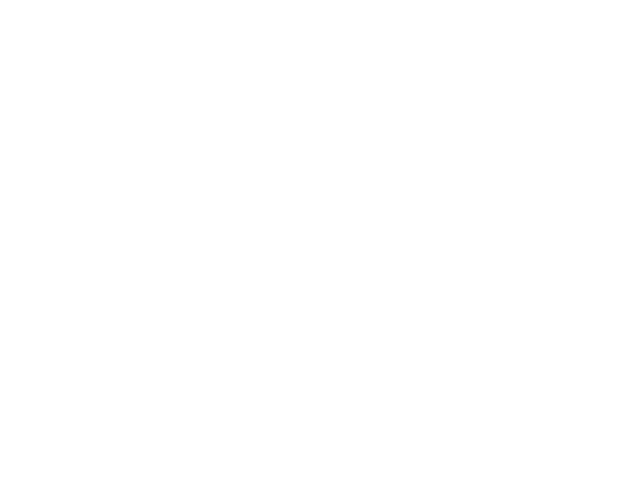

In [45]:
import numpy as np
fin_df = fin_df.replace(np.nan,0)
g = fin_df.groupby(["Date"]).val.sum()
g.plot.bar()
plt.ylabel("Contacts")
plt.tight_layout()

In [46]:
fin_df.columns

Index(['Titel', 'Medientyp', 'Ungew Fälle auf Basis Gesamt 16+',
       'Fälle (ungew) auf Basis ZG/Vorfilter', 'Unique User %',
       'Unique User Mio', 'Kontakte Mio', 'Analyse', 'Grundgesamtheit',
       'Zeitraum', 'Vorfilter', 'Zielgruppe', 'Monat', 'val', 'Date'],
      dtype='object')

In [47]:
fin_df.Medientyp.unique()

array([0, 'Digitales Gesamtangebot', 'Website Angebot',
       'Mobiles Gesamtangebot'], dtype=object)

<IPython.core.display.Javascript object>


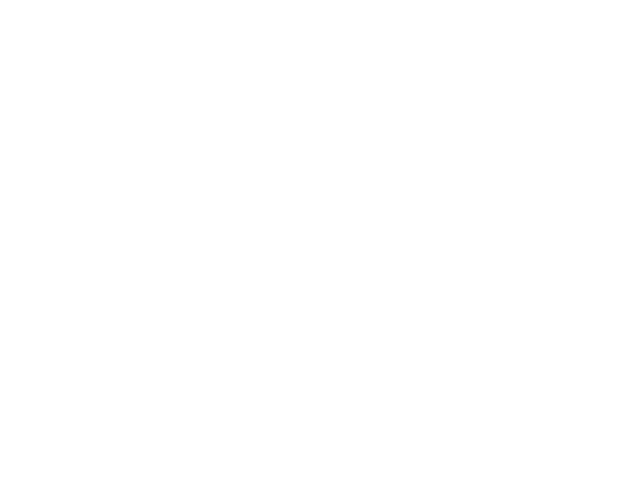

In [48]:
%matplotlib notebook
df_new = fin_df[fin_df.Medientyp != 0]
g1 = df_new.groupby(["Medientyp"]).val.sum()
g1.plot.bar()
plt.ylabel("Contacts")
plt.xticks(rotation='horizontal')
plt.tight_layout()

In [49]:
list(g1.index)

['Digitales Gesamtangebot', 'Mobiles Gesamtangebot', 'Website Angebot']

<IPython.core.display.Javascript object>


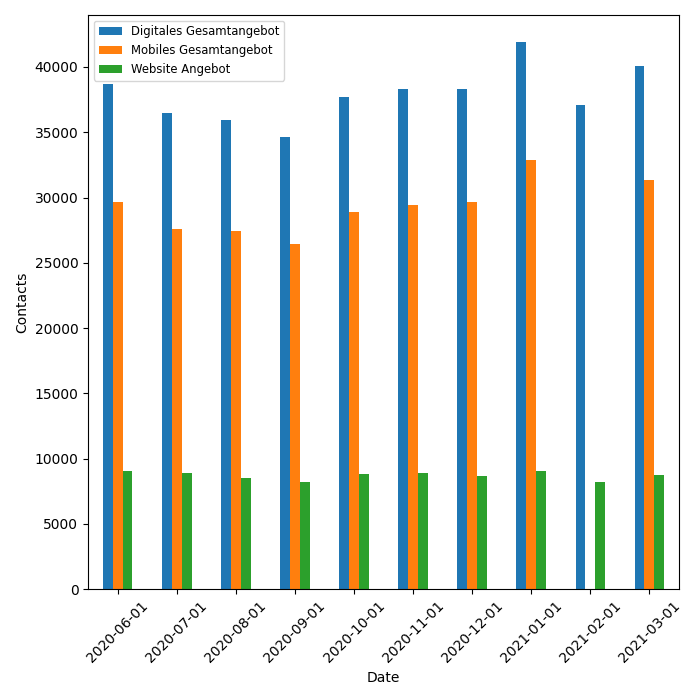

In [50]:
%matplotlib notebook

df_new = fin_df[fin_df.Medientyp != 0]
# Monthly contacts for each media group
g1 = df_new.groupby(["Date","Medientyp"]).val.sum().unstack()
# contact of different media group per month
# g1 = df_new.groupby(["Date","Medientyp"]).val.sum().unstack(0)
plt.rcParams["figure.figsize"] = [7,7]
g1.plot.bar(rot=45)

plt.ylabel("Contacts")
plt.legend(fontsize='small')
plt.tight_layout()